## quick select with counting - code showcase


In [12]:
import random

def partition_count(array, pivot):
    """Partition the array into counts of elements < pivot and == pivot."""
    left_count = 0
    equal_count = 0

    for element in array:
        if element < pivot:
            left_count += 1
        elif element == pivot:
            equal_count += 1

    return left_count, equal_count

def quickselect(array, k):
    """Find the k-th smallest element using Quickselect with counting."""
    while True:
        # Choose pivot (simplest: first element)
        pivot = array[0]

        # Partition the array
        left_count, equal_count = partition_count(array, pivot)

        # Determine where k lies
        if k < left_count:
            # Search in the left subarray (elements < pivot)
            array = [element for element in array if element < pivot]
        elif k < left_count + equal_count:
            # k-th element is the pivot
            return pivot
        else:
            # Search in the right subarray (elements > pivot)
            array = [element for element in array if element > pivot]
            k -= (left_count + equal_count)

def main():
    # Input: size of the vector
    size = 8

    # Create a vector with random integers
    vector = [random.randint(1, 100) for _ in range(size)]

    # Print the vector
    print("Vector:", vector)

    # Find and print the median
    if size % 2 == 1:
        # Odd size: middle element
        median = quickselect(vector, size // 2)
    else:
        # Even size: average of two middle elements
        left_middle = quickselect(vector, size // 2 - 1)
        right_middle = quickselect(vector, size // 2)
        median = (left_middle + right_middle) / 2

    print("Median:", median)

if __name__ == "__main__":
    main()


Vector: [5, 56, 24, 18, 60, 90, 66, 88]
Median: 58.0


## quick select with counting - graph




Initial Vector: [5, 6, 8, 1, 6, 4, 8]


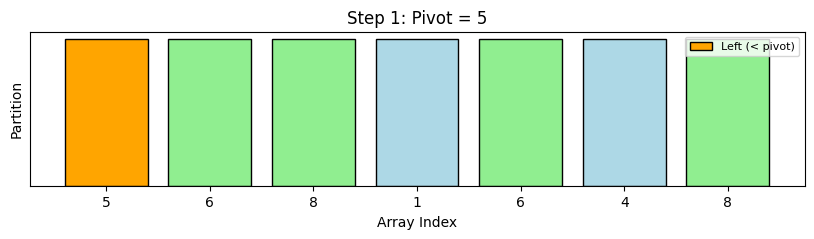

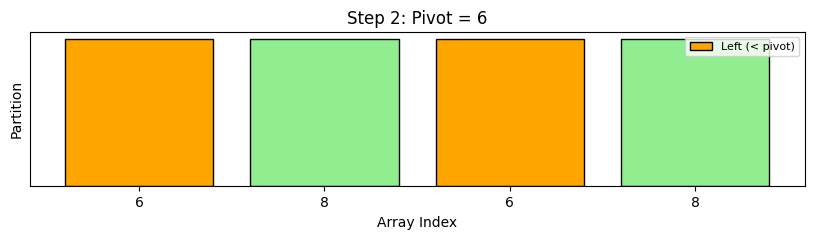

Found the k-th element (0): 6

Median: 6


In [23]:
import random
import matplotlib.pyplot as plt
import numpy as np

def visualize_step(array, left_partition, equal_partition, right_partition, pivot, step):
    """Graphically visualize the current step of Quickselect."""
    plt.figure(figsize=(10, 2))

    # Define colors for partitions
    colors = []
    for element in array:
        if element in left_partition:
            colors.append("lightblue")  # Left partition
        elif element in equal_partition:
            colors.append("orange")  # Pivot
        elif element in right_partition:
            colors.append("lightgreen")  # Right partition
        else:
            colors.append("grey")  # Unprocessed elements

    # Create a bar chart representing the array
    x_positions = np.arange(len(array))
    plt.bar(x_positions, [1] * len(array), color=colors, edgecolor="black", tick_label=array, width=0.8)

    # Add labels and title
    plt.title(f"Step {step}: Pivot = {pivot}")
    plt.xticks(fontsize=10)
    plt.yticks([])
    plt.xlabel("Array Index")
    plt.ylabel("Partition")

    # Highlight partitions
    plt.legend(["Left (< pivot)", "Pivot", "Right (> pivot)"], loc="upper right", fontsize=8)

    plt.show()

def quickselect_visualized(array, k):
    """Find the k-th smallest element with graphical visualizations."""
    step = 1
    while True:
        # Choose pivot (simplest: first element)
        pivot = array[0]

        # Partition the array
        left_partition = [element for element in array if element < pivot]
        equal_partition = [element for element in array if element == pivot]
        right_partition = [element for element in array if element > pivot]

        # Visualize current step
        visualize_step(array, left_partition, equal_partition, right_partition, pivot, step)

        left_count = len(left_partition)
        equal_count = len(equal_partition)

        # Determine where k lies
        if k < left_count:
            # Search in the left subarray (elements < pivot)
            array = left_partition
        elif k < left_count + equal_count:
            # k-th element is the pivot
            print(f"Found the k-th element ({k}): {pivot}")
            return pivot
        else:
            # Search in the right subarray (elements > pivot)
            array = right_partition
            k -= (left_count + equal_count)

        step += 1

def main():
    # Input: size of the vector
    size = 7
    # Create a vector with random integers
    vector = [random.randint(1, 10) for _ in range(size)]

    # Print the vector
    print("Initial Vector:", vector)

    # Find and print the median
    if size % 2 == 1:
        # Odd size: middle element
        median = quickselect_visualized(vector, size // 2)
    else:
        # Even size: use a single pass to find the two middle elements
        middle_indices = [size // 2 - 1, size // 2]
        sorted_middles = []
        for k in middle_indices:
            sorted_middles.append(quickselect_visualized(vector, k))
        median = sum(sorted_middles) / 2  # Average of the two middle elements

    print("\nMedian:", median)


if __name__ == "__main__":
    main()


# quick select with swaping simple code


In [31]:
import random

def partition_swap(array, pivot):
    """Partition the array by swapping elements < pivot to the left and > pivot to the right."""
    left = 0
    right = len(array) - 1

    while left <= right:
        if array[left] < pivot:
            left += 1
        elif array[right] > pivot:
            right -= 1
        else:
            # Swap elements at left and right
            array[left], array[right] = array[right], array[left]
            left += 1
            right -= 1

    return left  # Return the partition index

def quickselect(array, k):
    """Find the k-th smallest element using Quickselect with swapping."""
    while True:
        # Choose pivot (simplest: first element)
        pivot = array[0]

        # Partition the array using the pivot and get the partition index
        partition_index = partition_swap(array, pivot)

        # Determine where k lies
        if k < partition_index:
            # Search in the left subarray (elements < pivot)
            array = array[:partition_index]
        elif k == partition_index:
            # k-th element is the pivot
            return array[partition_index]
        else:
            # Search in the right subarray (elements > pivot)
            k -= partition_index
            array = array[partition_index:]

def main():
    # Input: size of the vector
    size = 8

    # Create a vector with random integers
    vector = [random.randint(1, 100) for _ in range(size)]

    # Print the vector
    print("Vector:", vector)

    # Find and print the median
    if size % 2 == 1:
        # Odd size: middle element
        median = quickselect(vector, size // 2)
    else:
        # Even size: average of two middle elements
        left_middle = quickselect(vector, size // 2 - 1)
        right_middle = quickselect(vector, size // 2)
        median = (left_middle + right_middle) / 2

    print("Median:", median)

if __name__ == "__main__":
    main()


Vector: [73, 23, 51, 15, 74, 35, 37, 68]
Median: 44.0


## quick select with swaping - graph



Initial Vector: [8, 7, 4, 9, 7, 3, 8]


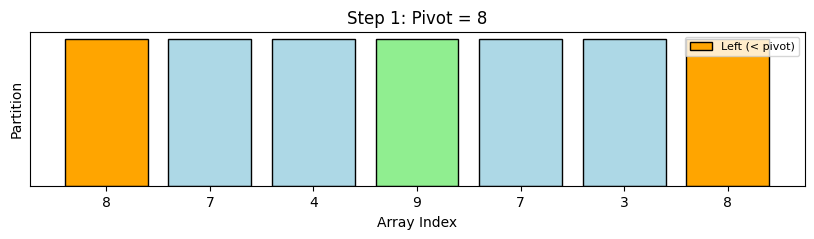

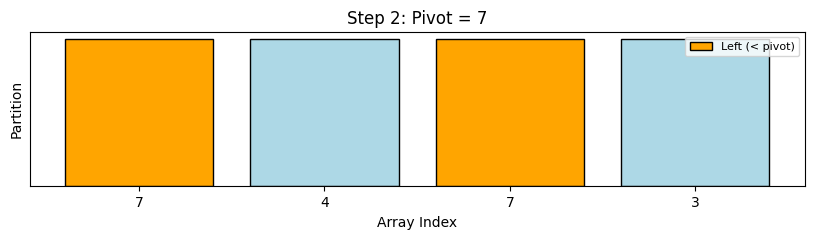

Found the k-th element (3): 7

Median: 7


In [30]:
import random
import matplotlib.pyplot as plt
import numpy as np

def visualize_step(array, left_partition, equal_partition, right_partition, pivot, step):
    """Graphically visualize the current step of Quickselect."""
    plt.figure(figsize=(10, 2))

    # Define colors for partitions
    colors = []
    for element in array:
        if element in left_partition:
            colors.append("lightblue")  # Left partition
        elif element in equal_partition:
            colors.append("orange")  # Pivot
        elif element in right_partition:
            colors.append("lightgreen")  # Right partition
        else:
            colors.append("grey")  # Unprocessed elements

    # Create a bar chart representing the array
    x_positions = np.arange(len(array))
    plt.bar(x_positions, [1] * len(array), color=colors, edgecolor="black", tick_label=array, width=0.8)

    # Add labels and title
    plt.title(f"Step {step}: Pivot = {pivot}")
    plt.xticks(fontsize=10)
    plt.yticks([])
    plt.xlabel("Array Index")
    plt.ylabel("Partition")

    # Highlight partitions
    plt.legend(["Left (< pivot)", "Pivot", "Right (> pivot)"], loc="upper right", fontsize=8)

    plt.show()

def partition_swap(array, pivot):
    """Partition the array by swapping elements into left, equal, and right partitions."""
    left = []
    right = []
    pivot_elements = []

    for element in array:
        if element < pivot:
            left.append(element)
        elif element > pivot:
            right.append(element)
        else:
            pivot_elements.append(element)

    # Swapping elements to correct positions
    return left, pivot_elements, right

def quickselect_visualized(array, k):
    """Find the k-th smallest element using swapping and graphical visualizations."""
    step = 1
    while True:
        # Choose pivot (simplest: first element)
        pivot = array[0]

        # Partition the array by swapping
        left_partition, equal_partition, right_partition = partition_swap(array, pivot)

        # Visualize current step
        visualize_step(array, left_partition, equal_partition, right_partition, pivot, step)

        left_count = len(left_partition)
        equal_count = len(equal_partition)

        # Determine where k lies
        if k < left_count:
            # Search in the left subarray (elements < pivot)
            array = left_partition
        elif k < left_count + equal_count:
            # k-th element is the pivot
            print(f"Found the k-th element ({k}): {pivot}")
            return pivot
        else:
            # Search in the right subarray (elements > pivot)
            array = right_partition
            k -= (left_count + equal_count)

        step += 1

def main():
    # Input: size of the vector
    size = 7
    # Create a vector with random integers
    vector = [random.randint(1, 10) for _ in range(size)]

    # Print the vector
    print("Initial Vector:", vector)

    # Find and print the median
    if size % 2 == 1:
        # Odd size: middle element
        median = quickselect_visualized(vector, size // 2)
    else:
        # Even size: use a single pass to find the two middle elements
        middle_indices = [size // 2 - 1, size // 2]
        sorted_middles = []
        for k in middle_indices:
            sorted_middles.append(quickselect_visualized(vector, k))
        median = sum(sorted_middles) / 2  # Average of the two middle elements

    print("\nMedian:", median)


if __name__ == "__main__":
    main()
